# Algorithmes de parcours de graphes

L'enjeu le plus important des graphes et leur parcours pour en extraire certaines propriétés. Par exemple le flot maximum qui peut parcourir un réseau informatique, le nombre de descendant d'un ancêtre commun, ... Du fait des différents types de graphes (orienté ou non, connexe ou non, arbre ou non, cyclique ou non, ...) les algorithmes de parcours des graphes seront plus ou moins compliqués. On étudie ici les différents algorithmes de parcours des graphes.

In [1]:
from random import randint

import networkx as nx
import matplotlib.pyplot as plt

def random_graph(nb_arêtes = 14, 
                 noeud_min = 1, 
                 noeud_max = 12):
    
    G = nx.Graph()
    
    assert noeud_min <= noeud_max

    for _ in range(nb_arêtes):
        départ = randint(noeud_min, noeud_max) 
        arrivée = randint(noeud_min, noeud_max)
        # interdire les boucles
        while départ == arrivée:
            départ = randint(noeud_min, noeud_max) 
            arrivée = randint(noeud_min, noeud_max)
        G.add_edge(départ, arrivée)
    
    return G

def networkx2adjacency(graph):
    adjacency_list = {}
    for (start, stop) in graph.edges:
        if start in adjacency_list:
            adjacency_list[start].add(stop)
        else:
            adjacency_list[start] = {stop,}
        # non-oriented graph
        if stop in adjacency_list:
            adjacency_list[stop].add(start)
        else:
            adjacency_list[stop] = {start,}
    return adjacency_list

options = {
    "font_size": 12,
    "node_size": 800,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}

## Parcours de l'ensemble du graphe

Parcourir l'ensemble d'un graphe sans en extraire la moindre information n'a quasiment pas de sens. En général, on cherche à collecter une information tandis que l'on parcourt le graphe. On ne va ici donner que les algorithmes de parcours de graphe, il faudra donc adapter ces algorithmes pour capturer l'information voulue en fonction de la tâche à réaliser.

Générons un graphe aléatoire, et parcourons le de différentes façons.

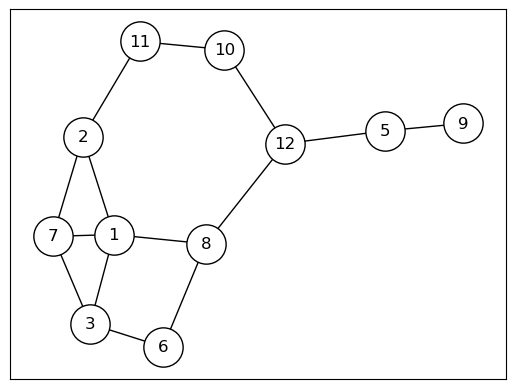

In [2]:
G = random_graph()
nx.draw_networkx(G, **options)

Pour les besoins ultérieurs, remarquons que l'on utilise des `set`s dans la liste d'adjacence (qui est en fait un `dict`).

In [3]:
adjacency_list = networkx2adjacency(G)
adjacency_list

{10: {11, 12},
 11: {2, 10},
 12: {5, 8, 10},
 2: {1, 7, 11},
 1: {2, 3, 7, 8},
 7: {1, 2, 3},
 3: {1, 6, 7},
 8: {1, 6, 12},
 5: {9, 12},
 9: {5},
 6: {3, 8}}

Les algorithmes de parcours les plus utilisés sont les algorithmes de [parcours en largeur](https://en.wikipedia.org/wiki/Breadth-first_search) (_breadth-first search_ en anglais) et de [parcours en profondeur](https://en.wikipedia.org/wiki/Depth-first_search) (_depth-first search_) qui, comme leurs noms l'indiquent, parcourent le graphe par succession de noeuds pris parmis les plus anciens ou les plus récents, respectivement.

Pour chaque algorithme, on part du noeud d'entrée (`start_node`), et on rajoute l'ensemble des noeuds voisins dans une queue, ou pile de noeuds à traiter. On recommence alors tant que la pile n'est pas vide. Pour s'assurer que l'on ne repasse pas deux fois par le même noeud, on génère une liste de noeuds déjà visités.

La seule différence entre les deux algorithmes est la façon de traiter la pile : à l'étape $n$ soit on extrait les voisins du dernier noeud rajouté à l'étape $n-1$, soit on prend le premier noeud rajouté depuis le lancement de l'algorithme et non encore traité. C'est la fonction `pop(-1)` ou `pop(0)` des liste Python qui indique quel est la méthode utilisée.

In [4]:
def breadth_first_search(adjacency_list, start_node):
    """
    Perform a breadth first search using an adjancency list and a start node.
    """
    visited_nodes = []
    # better to use a set, but we want to keep the travelling order
    if start_node not in adjacency_list:
        return []
    queue = [start_node]
    # the algorithm executes until we visit all nodes
    while queue:
        # get the first added node (FIFO mode, or pile)
        current_node = queue.pop(0)
        visited_nodes.append(current_node)
        neighbors = adjacency_list.get(current_node, [])
        # avoid looping using the visited_nodes
        queue += [n for n in neighbors
                  if n not in visited_nodes and n not in queue]
    return visited_nodes


def depth_first_search(adjacency_list, start_node):
    """
    Perform a breadth first search using an adjancency list and a start node.
    """
    visited_nodes = []
    # better to use a set, but we want to keep the travelling order
    if start_node not in adjacency_list:
        return []
    queue = [start_node]
    # the algorithm executes until we visit all nodes
    while queue:
        # get the last added node (LILO mode, or stack)
        current_node = queue.pop(-1)
        visited_nodes.append(current_node)
        neighbors = adjacency_list.get(current_node, [])
        # avoid looping using the visited_nodes
        queue += [n for n in neighbors
                  if n not in visited_nodes and n not in queue]
    return visited_nodes

print("BFS: ", breadth_first_search(adjacency_list, 1))
print("DFS: ", depth_first_search(adjacency_list, 1))

BFS:  [1, 8, 2, 3, 7, 12, 6, 11, 10, 5, 9]
DFS:  [1, 7, 3, 6, 2, 11, 10, 12, 5, 9, 8]


On peut s'appuyer sur les `set` Python et ne pas se soucier du tout de l'ordre de fouille si l'on a pour stratégie de regarder tous les noeuds du graphe. Il faut s'assurer pour cela que la liste d'adjacence soit construite à patir de `set` et non pas de `list`.

In [5]:
def set_search(adjacency_list, start_node):
    """
    Perform a breadth first search using an adjancency list and a start node.
    """
    visited_nodes = []
    # better to use a set, but we want to keep the travelling order
    if start_node not in adjacency_list:
        return []
    queue = {start_node,}
    # the algorithm executes until we visit all nodes
    while queue:
        # set are unordered sequence of unique elements
        current_node = queue.pop()
        visited_nodes.append(current_node)
        neighbors = adjacency_list.get(current_node, set())
        # avoid looping using the visited_nodes
        queue.update(neighbors.difference(visited_nodes))
    return visited_nodes

print("SS: ", set_search(adjacency_list, 1))

SS:  [1, 2, 3, 6, 7, 8, 11, 12, 5, 9, 10]


On illustre les stratégies de fouille d'arbre dans quelques cas utiles ci-dessous.

## Trouver un chemin entr deux noeuds.

Pour trouver un des chemins possibles entre deux noeuds, il suffit de faire une fouille en profondeur jusqu'à trouver le noeud cible

In [6]:
def find_one_path(adjacency_list, start_node, end_node):
    """Find one path linking start_node to end_node."""
    path = []
    queue = [start_node]
    visited_nodes = set()
    while queue:
        current_node = queue.pop(-1)
        if current_node == end_node:
            path.append(current_node)
            return path
        visited_nodes.add(current_node)
        neighbors = adjacency_list.get(current_node, {}).difference(visited_nodes)
        path.append(current_node)
        queue += list(neighbors)
    return []

In [7]:
for _ in range(5):
    i = randint(0, len(adjacency_list)-1)
    start = list(adjacency_list.keys())[i]
    j = randint(0, len(adjacency_list)-1)
    while j == i:
        j = randint(0, len(adjacency_list)-1)
    stop = list(adjacency_list.keys())[j]
    string = f"path from {start} to {stop}"
    print(string, find_one_path(adjacency_list, start, stop))

path from 9 to 11 [9, 5, 12, 10, 11]
path from 9 to 1 [9, 5, 12, 10, 11, 2, 7, 3, 6, 8, 1]
path from 5 to 7 [5, 12, 10, 11, 2, 7]
path from 1 to 11 [1, 7, 3, 6, 8, 12, 5, 9, 10, 11]
path from 9 to 3 [9, 5, 12, 10, 11, 2, 7, 3]


Notons toutefois que rien ne garantit que le chemin ainsi trouvé soit le plus court. Pour trouver le plus court chemin, il faut en principe essayer tous les chemins.

## Rechercher tous les chemins entre deux noeuds.

Pour extraire tous les chemins entre deux noeuds, on préfèrera procéder par récurence. On commence par le noeud de départ Soit on a trouvé le noeud final, soit on rajoute le noeud actuel au chemin, et on recommence à partir du noeud actuel en rappelant la fonction récursive.

In [8]:
def find_all_paths(adjacency_list,
                   start_node,
                   end_node,
                   path=list()):
    """Find paths from `start_node` to `end_node` using adjacency list `adjacency_list`.
    adjlist is supposed to represent index of nodes 
    {idx_node1: [next_idx_node11, next_idx_node_12, ...],
     idx_node2: [next_idx_node21, ...]}
    In a directed graph, some nodes might be missing.
    from https://www.python.org/doc/essays/graphs/"""
    path = path + [start_node]
    neighbors = adjacency_list.get(start_node, [])
    if not neighbors:
        return []
    if start_node == end_node:
        return [path]
    paths = []
    for neighbor in neighbors:
        # avoid looping
        if neighbor not in path:
            paths += find_all_paths(
                adjacency_list=adjacency_list,
                start_node=neighbor,
                end_node=end_node,
                path=path)
    return paths

In [9]:
for _ in range(5):
    i = randint(0, len(adjacency_list)-1)
    start = list(adjacency_list.keys())[i]
    j = randint(0, len(adjacency_list)-1)
    while j == i:
        j = randint(0, len(adjacency_list)-1)
    stop = list(adjacency_list.keys())[j]
    string = f"paths from {start} to {stop}"
    print(string, find_all_paths(adjacency_list, start, stop))

paths from 6 to 5 [[6, 8, 1, 2, 11, 10, 12, 5], [6, 8, 1, 3, 7, 2, 11, 10, 12, 5], [6, 8, 1, 7, 2, 11, 10, 12, 5], [6, 8, 12, 5], [6, 3, 1, 8, 12, 5], [6, 3, 1, 2, 11, 10, 12, 5], [6, 3, 1, 7, 2, 11, 10, 12, 5], [6, 3, 7, 1, 8, 12, 5], [6, 3, 7, 1, 2, 11, 10, 12, 5], [6, 3, 7, 2, 1, 8, 12, 5], [6, 3, 7, 2, 11, 10, 12, 5]]
paths from 12 to 10 [[12, 8, 1, 2, 11, 10], [12, 8, 1, 3, 7, 2, 11, 10], [12, 8, 1, 7, 2, 11, 10], [12, 8, 6, 3, 1, 2, 11, 10], [12, 8, 6, 3, 1, 7, 2, 11, 10], [12, 8, 6, 3, 7, 1, 2, 11, 10], [12, 8, 6, 3, 7, 2, 11, 10], [12, 10]]
paths from 9 to 5 [[9, 5]]
paths from 11 to 5 [[11, 10, 12, 5], [11, 2, 1, 8, 12, 5], [11, 2, 1, 3, 6, 8, 12, 5], [11, 2, 1, 7, 3, 6, 8, 12, 5], [11, 2, 7, 1, 8, 12, 5], [11, 2, 7, 1, 3, 6, 8, 12, 5], [11, 2, 7, 3, 1, 8, 12, 5], [11, 2, 7, 3, 6, 8, 12, 5]]
paths from 9 to 3 [[9, 5, 12, 8, 1, 2, 7, 3], [9, 5, 12, 8, 1, 3], [9, 5, 12, 8, 1, 7, 3], [9, 5, 12, 8, 6, 3], [9, 5, 12, 10, 11, 2, 1, 8, 6, 3], [9, 5, 12, 10, 11, 2, 1, 3], [9, 5, 12, 1

## Calculer les distances entre noeuds

On se concentre sur les graphes non-orientés dont les poids (ou les distances) entre les noeuds sont tous égaux. La distance entre deux noeuds est alors simplement le nombre d'arrêtes entre les deux noeuds. Pour calculer le nombre d'arrêtes entre un noeud et l'ensemble des autres noeuds, on peut faire une fouille en largeur de l'arbre, et mettre à jour un dictionnaire renseignant les distances à chaque étape. 

In [10]:
def calculate_distances(adjacency_list,
                        start_node,
                        stop_node=None):
    """
    Calculate all the distances between start_node and end_node,
    adding +1 while moving from the start_node at each edge.
    """
    distances = {}
    distances[start_node] = 0
    # distances also captures all the already visited nodes
    queue = [start_node]
    # The algorithm executes until we visit all nodes
    # or find the end_node.
    while queue:
        current_node = queue.pop(0)
        neighbors = adjacency_list[current_node]
        # avoid the loop thanks to the visited_nodes
        queue += [n for n in neighbors if n not in distances]
        for neighbor in neighbors:
            # stop in case we reached the final node
            if neighbor == stop_node:
                return distances
            if neighbor not in distances:
                distances[neighbor] = distances[current_node] + 1
    return distances

In [11]:
calculate_distances(adjacency_list, 1)

{1: 0, 8: 1, 2: 1, 3: 1, 7: 1, 12: 2, 6: 2, 11: 2, 10: 3, 5: 3, 9: 4}

## Algorithmes de plus court chemin

L'algorithme donnant le plus court chemin dans le cas général est l'[algorithme de Dijkstra](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) ou l'[algorithme de Bellman-Ford](https://en.wikipedia.org/wiki/Bellman%E2%80%93Ford_algorithm) si les distance entre les noeuds peuvent être négatives. On ne donne que l'algorithme de Dijkstra ci-dessous, et on montre comment reconstruire le chemin le plus court entre deux noeuds depuis la liste d'ajacence des plus proches voisins constituant le plus court chemin.

In [12]:
def dijkstra_algorithm(
        distance_graph, start_node,
        get_neighbors = lambda adjlist, node: set(adjlist[node].keys()),
        get_distance = lambda adjlist, start_node, stop_node: adjlist[start_node][stop_node]
        ):
    """Construct the adjacency list of nearest nodes and the dictionnary of shortest path from the start_node to all other nodes in the graph.
    
    ditance_graph is an adjacency_list of the form
    {node1: {neighbor1: distance1, neighbor2: distance2},
     node2: {neighbor3, distance3}, 
     ...}
    
    See shortest_path to construct the path from the previous_nodes and shortest_path dictionnaries.
    
    from https://www.udacity.com/blog/2021/10/implementing-dijkstras-algorithm-in-python.html"""
    max_value = 2 * len(adjacency_list)
    shortest_path = {k: max_value for k in adjacency_list.keys()}
    previous_nodes = {}
    shortest_path[start_node] = 0
    unvisited_nodes = list(adjacency_list.keys())

    while unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = unvisited_nodes[0]
        for node in unvisited_nodes[1:]: # Iterate over the nodes
            if shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = get_neighbors(distance_graph, current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + get_distance(
                distance_graph, current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path

def shortest_path(distance_graph, start_node, end_node):
    """Construct the shortest path from the start_node to the end_node."""
    previous_nodes, shortest_path = dijkstra_algorithm(
        distance_graph, start_node)
    
    path = []
    node = end_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
    # Add the start node manually
    path.append(start_node)
    return path[::-1]

In [13]:
distance_graph = {k : {v: 1 for v in neighbors}
                  for k, neighbors in adjacency_list.items()}

print(f"shortest path from {start} to {stop}",
      shortest_path(distance_graph, start, stop))

shortest path from 9 to 3 [9, 5, 12, 8, 1, 3]
